## Inicialização

### Imports necessários

In [22]:
import sys
sys.path.append('..')
pd.options.display.max_columns = 500

import pandas as pd
from config import *

### Leitura dos dados pré processados

In [23]:
df = pd.read_csv(path_arquivo_pprocessed)

## Clusterização

### Separação de variáveis categoricas

In [6]:
features = ['marital', 'y_educa', 'gender', 'age','n_children', 'takes_medicine', 'kind_health_ins',
            'functional_score','cover_score', 'flexibility_score','work_life']

cat_col = ['marital','gender','kind_health_ins']

In [7]:
# Transformando em colunas dummy

df_cluster = pd.get_dummies(df[features],columns=cat_col,drop_first=True)

### Normalizações

In [9]:
# Normalizando scores (via divisao pelo maximo)

dic = {'max_func_score':df_cluster['functional_score'].max(),
       'max_cover_score':df_cluster['cover_score'].max(),
       'max_flex_score':df_cluster['flexibility_score'].max()}

df_cluster.loc[:,'functional_score'] = df_cluster['functional_score']/df_cluster['functional_score'].max()
df_cluster.loc[:,'cover_score'] = df_cluster['cover_score']/df_cluster['cover_score'].max()
df_cluster.loc[:,'flexibility_score'] = df_cluster['flexibility_score']/df_cluster['flexibility_score'].max()


In [10]:
# Normalizando via standartscaler
from sklearn.preprocessing import StandardScaler

X = df_cluster.loc[:,['y_educa','age','n_children','work_life']]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_cluster.loc[:,['y_educa','age','n_children','work_life']] = X_scaled

### Elbow Curve

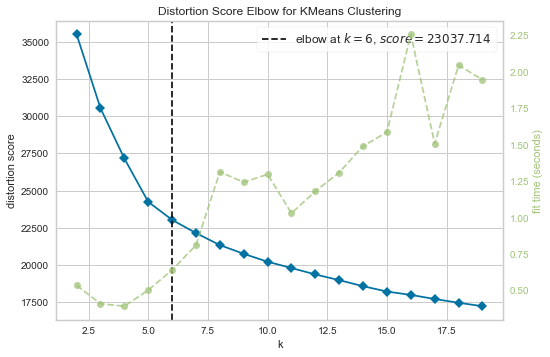

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(df_cluster)        
visualizer.show()   

### K-means

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0).fit(df_cluster)
df['labels'] = kmeans.labels_

array([5, 5, 1, ..., 4, 3, 0])

In [21]:
df

,folio,marital,y_educa,gender,age,last_level_school,religion,n_children,takes_medicine,kind_health_ins,...,functional_score,cover_score,flexibility_score,work_life,labels_0,labels_1,labels_2,labels_3,labels_4,labels_5
0,0,Widowed,4.0,2,82,1.0,Anglican,6.0,1.0,Other public insurance,...,10.0,8.0,0.0,44.0,0,0,0,0,0,1
1,1,Married,2.0,2,82,1.0,Roman Catholic,1.0,1.0,Social security,...,8.0,0.0,30.0,44.0,0,0,0,0,0,1
2,2,Married,0.0,2,83,1.0,Anglican,11.0,1.0,Social security,...,10.0,0.0,23.0,67.0,0,1,0,0,0,0
3,3,Married,0.0,2,75,1.0,Roman Catholic,3.0,1.0,Social security,...,10.0,0.0,23.0,66.0,0,0,0,0,0,1
4,4,Widowed,4.0,1,78,1.0,Roman Catholic,2.0,1.0,Social security,...,6.0,0.0,10.0,47.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431,7445,Others,8.0,1,60,1.0,Others,5.0,1.0,None,...,9.0,0.0,40.0,43.0,0,0,0,1,0,0
7432,7446,Others,10.0,2,60,1.0,Others,0.0,0.0,None,...,10.0,0.0,40.0,47.0,0,0,0,0,1,0
7433,7447,Married,10.0,2,60,1.0,Others,2.0,1.0,None,...,9.0,0.0,40.0,41.0,0,0,0,0,1,0
7434,7448,Married,5.0,2,60,1.0,Anglican,4.0,1.0,Private security,...,10.0,22.0,40.0,45.0,0,0,0,1,0,0


## Resultados

In [54]:
df.groupby('labels')[['marital', 'y_educa', 'gender', 'age', 'last_level_school',
       'religion', 'n_children', 'takes_medicine', 'kind_health_ins',
       'times_hospital', 'payd_job', 'age_begin_working', 'age_stop_working',
       'country', 'functional_score', 'cover_score', 'flexibility_score',
       'work_life']].mean()

,y_educa,gender,age,last_level_school,n_children,takes_medicine,times_hospital,payd_job,age_begin_working,age_stop_working,functional_score,cover_score,flexibility_score,work_life
labels,,,,,,,,,,,,,,
0,5.023479,1.025614,66.724653,1.194237,3.439701,0.615795,0.071505,0.721451,23.002383,36.149691,7.774813,5.372465,32.359658,9.092269
1,2.536501,1.400927,73.599073,1.129780,9.312862,0.660487,0.090382,0.942063,15.085714,61.875000,7.230591,2.336037,34.630359,44.674823
2,3.959103,1.023747,81.017150,1.150396,3.110818,0.697889,0.055409,0.637203,22.259756,37.536199,6.159631,4.724274,28.935356,8.907900
3,4.014201,1.496106,66.135593,1.162162,2.678424,0.568484,0.049473,0.991754,14.606166,61.226752,8.167659,4.289510,33.890060,46.620586
4,12.816574,1.500931,69.022346,1.853818,2.373371,0.608939,0.045624,0.990689,18.582770,61.514527,8.486034,6.659218,31.303538,42.651940
5,3.534855,1.500925,79.990130,1.114744,2.388032,0.704503,0.071561,0.987045,14.797807,67.479334,7.015423,4.306601,32.730413,52.681527


<AxesSubplot:>

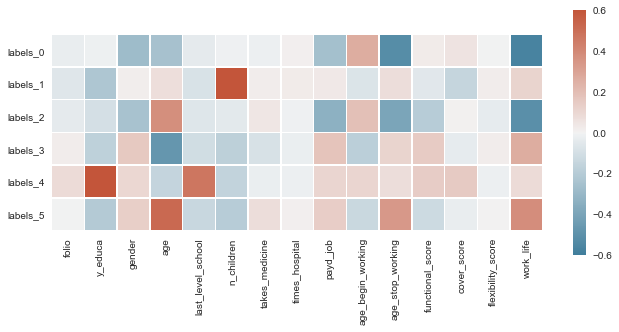

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

n_clusters = 6

df = pd.get_dummies(df,columns=['labels'])

corr = df.corr()[['labels_0','labels_1','labels_2','labels_3','labels_4','labels_5']].iloc[:-6].T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.6, center=0, vmin=-.6,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='country', ylabel='Probability'>

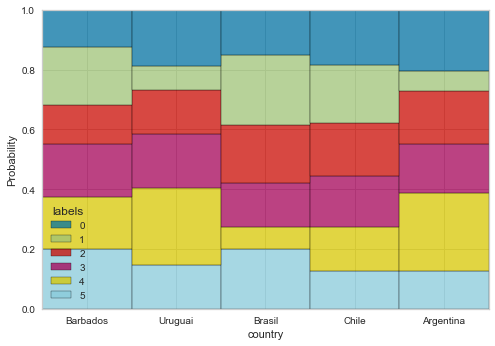

In [47]:
import seaborn as sns
sns.histplot(data=df.sort_values(by='labels'),
             x='country',
             hue='labels',
             stat='probability',
             multiple='fill',
             discrete = True,
             common_norm=False)